## Exercise 6.2 - Exploring Relationships
### Oliveira 05.08.2024

#### This script contains following sections:

- 1. Importing libraries and datasets
- 2. Selecting variables of interest
- 3. Exploring relationships
    - 3.1. Correlation Matrix
    - 3.2. Scatter Plots
    - 3.3. Pair Plots
    - 3.4. Categorical Plots

<hr style="border: none; height: 3px; background-color: #333;" />

## 1. Importing libraries and datasets

In [58]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [59]:
# Importing the dataframes

# creates a path with the source folder

path = r'C:\Users\Marc\Mariana_CareerFoundry\Achiev6'

# importing the dataframes

df_co2_cleaned = pd.read_csv(os.path.join(path,'02_Data','2-2_Prepared','co2_clean.csv'), index_col = False)

In [60]:
# Checking version matplotlib

matplotlib.__version__

'3.8.4'

In [61]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

<hr style="border: none; height: 3px; background-color: #333;" />

## 2. Selecting variables of interest

In [62]:
# Checking all the variables available

df_co2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 2453 non-null   int64  
 1   Country                                    2453 non-null   object 
 2   Year                                       2453 non-null   int64  
 3   iso_code                                   2387 non-null   object 
 4   population                                 2376 non-null   float64
 5   gdp                                        1804 non-null   float64
 6   cement_co2                                 2298 non-null   float64
 7   cement_co2_per_capita                      2298 non-null   float64
 8   co2                                        2354 non-null   float64
 9   co2_growth_abs                             2354 non-null   float64
 10  co2_growth_prct         

In [63]:
df_co2_cleaned.columns

Index(['Unnamed: 0', 'Country', 'Year', 'iso_code', 'population', 'gdp',
       'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs',
       'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', '

In [64]:
# picking up only some variables

df = df_co2_cleaned.filter([
    'population',
    'gdp',
    'co2',
    'co2_growth_prct',       
    'co2_per_capita', 
    'co2_per_gdp', 
    'co2_per_unit_energy', 
    'total_ghg', 
], axis = 1)

In [65]:
# I want to take out total_ghg and substitute through gdp_per_capita,  first I will rename the column

df.rename(columns = {'total_ghg' : 'gdp_per_capita'},
                      inplace = True)

In [66]:
# Here I calculate the gdp_per_capita dividing the gdp through population 
df['gdp_per_capita'] = df['gdp']/df['population']

In [67]:
df.describe()

,population,gdp,co2,co2_growth_prct,co2_per_capita,co2_per_gdp,co2_per_unit_energy,gdp_per_capita
count,2.376000e+03,1.804000e+03,2354.000000,2354.000000,2354.000000,1804.000000,2242.000000,1804.000000
mean,3.432790e+07,6.515238e+11,160.016285,2.367602,4.967917,0.253998,0.205482,17738.972446
std,1.350162e+08,2.129986e+12,799.088814,12.588857,6.087453,0.169968,0.074959,19350.048859
min,1.833000e+03,5.444287e+08,0.004000,-52.657000,0.024000,0.037000,0.028000,610.042170
25%,7.610282e+05,2.756526e+10,1.260250,-3.126500,0.862000,0.143000,0.167000,3967.076413
50%,6.275342e+06,9.052598e+10,8.658000,1.089500,2.918000,0.212000,0.203000,11802.681968
75%,2.337877e+07,4.184048e+11,55.678500,6.814000,6.679750,0.311250,0.235000,24441.666948
max,1.424930e+09,2.415184e+13,10914.012000,141.744000,48.970000,1.293000,0.794000,164146.398304


In [68]:
df.to_csv(os.path.join(path, '02_Data', '2-2_Prepared', 'co2_selected.csv'))

<hr style="border: none; height: 3px; background-color: #333;" />

## 3. Exploring Relationships


### 3.1.Correlation matrix

In [69]:
# Creating a correlation matrix

df.corr()

,population,gdp,co2,co2_growth_prct,co2_per_capita,co2_per_gdp,co2_per_unit_energy,gdp_per_capita
population,1.000000,0.776671,0.802799,0.009754,-0.014682,0.092600,0.112041,-0.047545
gdp,0.776671,1.000000,0.947064,-0.042580,0.177444,0.118439,0.072971,0.158969
co2,0.802799,0.947064,1.000000,-0.017138,0.132559,0.180216,0.086581,0.097670
co2_growth_prct,0.009754,-0.042580,-0.017138,1.000000,-0.072782,-0.014684,0.108504,-0.146530
co2_per_capita,-0.014682,0.177444,0.132559,-0.072782,1.000000,0.517379,0.044379,0.802474
co2_per_gdp,0.092600,0.118439,0.180216,-0.014684,0.517379,1.000000,0.453092,0.093153
co2_per_unit_energy,0.112041,0.072971,0.086581,0.108504,0.044379,0.453092,1.000000,-0.209961
gdp_per_capita,-0.047545,0.158969,0.097670,-0.146530,0.802474,0.093153,-0.209961,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

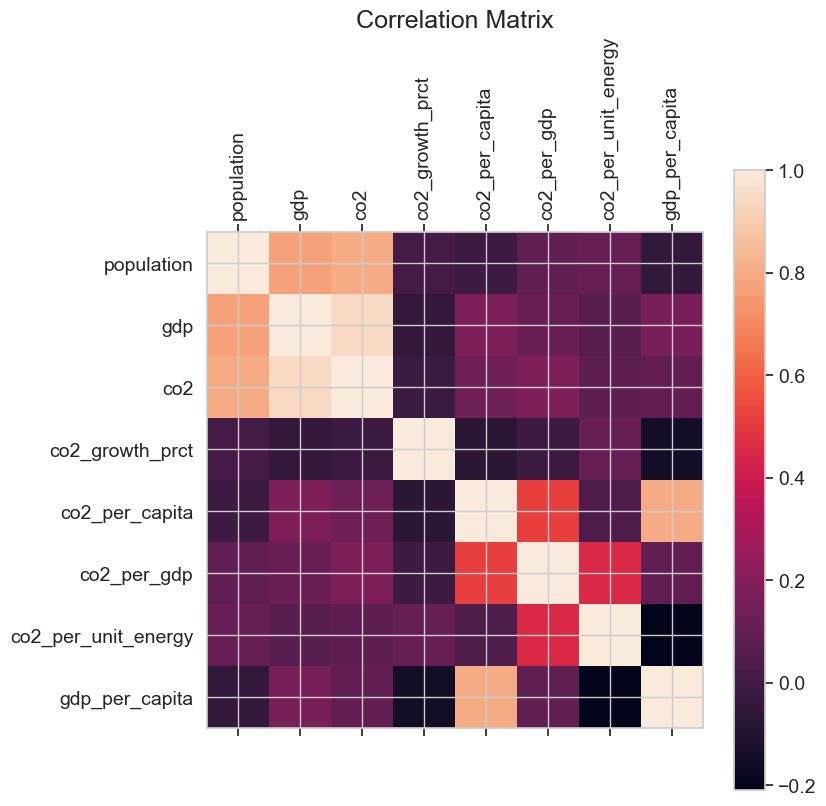

In [70]:
# Creating a heatmap with labels and legend

# figure size
f = plt.figure(figsize=(8, 8)) 

# type of plot
plt.matshow(df.corr(), fignum=f.number)    

# x axis labels
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)   

# y axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

# add a colour legend (called colorbar)
cb = plt.colorbar() 

# add font size
cb.ax.tick_params(labelsize=14)

# add title    
plt.title('Correlation Matrix', fontsize=18) 

### Discussion Correlation Matrix

When dividing the values of the correlation matrix into the three common categories, we have following results:

#### Strong relationships - over 0,5
* gdp and population: 0.776671
* co2 and population: 0.802799
* co2 and gdp: 0.947064
* co2_per_capita and gdp_per_capita: 0.802474

#### Moderate - between 0,3 and 0,5
* co2_per_capita and co2_per_gdp: 0.517379 	
* co2_per_unit_energy and co2_per_gdp:	0.453092
* gdp_per_capita and co2_per_gdp: 0.449006

#### Weak correlations - between 0,1 and 0,3
* population and co2_per_unit_energy: 0.112041
* gdp and co2_per_capita: 0.177444
* gdp and co2_per_gdp: 0.118439 
* gdp and gdp_per_capita: 0.158969
* co2 and co2_per_capita: 0.132559 	
* co2 and co2_per_gdp: 0.180216
* co2_per_unit_energy and gdp_per_capita: -0.209961
* co2_growth_prct and co2_per_unit_energy: 0.108504 
* co2_growth_prct and gdp_per_capita: -0.146530

## However, some variables are per definition mathematically codependent!!!
### The following relationships forbidden a proper correlation and therefore must be excluded from the analysis:

- population:
    - co2_per_capita, 
    - gdp_per_capita
- gdp:
    - co2_per_gdp,
    - gdp_per_capita 
- co2:
    - co2_growth_prct,
    - co2_per_capita,
    - co2_per_gdp,
    - co2_per_unit_energy,
    
When considering this covariance, the following results can be considered for further discussion:

#### Strong relationships - over 0,5
* gdp and population: 0.776671
* co2 and population: 0.802799
* co2 and gdp: 0.947064
* co2_per_capita and gdp_per_capita: 0.802474

#### Moderate - between 0,3 and 0,5
* co2_per_capita and co2_per_gdp: 0.517379 	
* co2_per_unit_energy and co2_per_gdp:	0.453092

#### Weak correlations - between 0,1 and 0,3
* population and co2_per_unit_energy: 0.112041
* gdp and co2_per_capita: 0.177444
* co2_per_unit_energy and gdp_per_capita: -0.209961
* co2_growth_prct and co2_per_unit_energy: 0.108504 
* co2_growth_prct and gdp_per_capita: -0.146530	


<hr style="border: none; height: 1px; background-color: #333;" />

### 3.2. Scatterplots

The following pairs were taken further, paying attention on the covariance

* gdp and population: 0.776671
* co2 and population: 0.802799
* co2 and gdp: 0.947064
* co2_per_capita and gdp_per_capita: 0.802474

#### Scatterplot GDP and Population

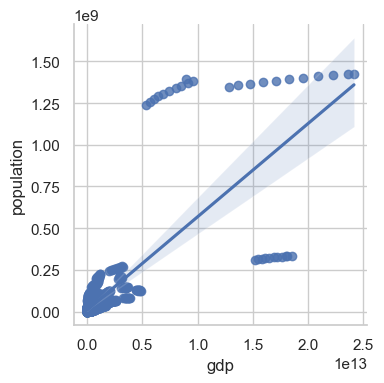

In [71]:
# This plot was generated with help of ChatGTP

# Create a scatterplot for"gdp" and "population" columns

# Setting height and aspect to control the size

sns.set(style="whitegrid")  # Use whitegrid style for background grid
g = sns.lmplot(x='gdp', y='population', data=df, height=4, aspect=1)

# Adjust layout to fit elements
plt.tight_layout()

# Show the plot
plt.show()

# Close the plot
plt.close()

#### Discussion
There series (countries) stand out in this visualization:
China (up right) with very high population and also vary high gdp. Here is also interesting to see how much the gdp increased in ten years, surpassing the USA (right down). On the top right we can also spot India, also with a huge population, but comparatively much smaller gdp.
Clustered down left are all other world countries. There we can also see the tendency of some with smaller population but high income and also the other way around (high population and lower income).

It is somehow expected that more people wil bring more power to economy, so higher Gross Domestic Product because of more economical activity. However countries with more industrialized economy will both have more economical power and co2 emission related to it than countries based on agriculture and turism for example. 

#### Scatterplot CO2 and Population

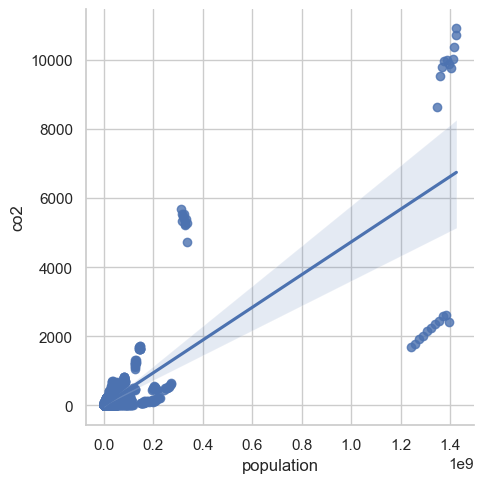

In [72]:
# Create a scatterplot for "co2" and "population" columns

sns.lmplot(x = 'population', y = 'co2', data = df)

#### Discussion
Three series (countries) stand out in this visualization:
China (up right) with very high population and also vary high CO2 emissions. On the down right we can also spot India, also with a huge population, but comparatively much smaller CO2 emissions. ON the left middle we have USA with its high population and very high CO2 emissions.
Clustered down left are all other world countries. 

Such as with GDP e with smaller population but high emissions and also the other way around (high population and lower emissions).

#### Scatterplot GDP and CO2 emissions

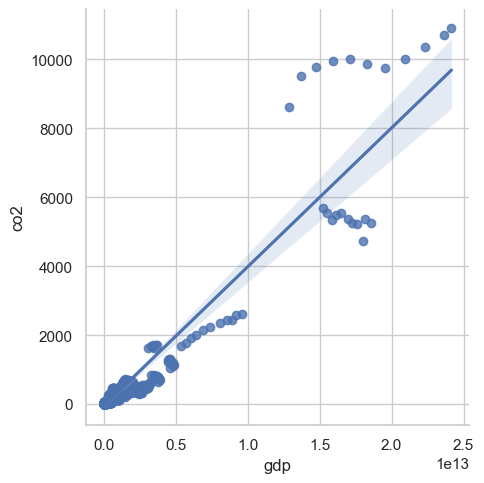

In [73]:
# Create a scatterplot for "gdp" and "co2" columns

sns.lmplot(x = 'gdp', y = 'co2', data = df)

#### Discussion
There series (countries) stand out in this visualization:
China (up right) with very high population and also vary high CO2 emissions. On the middle we have USA with similar GDP but lower CO2 emissions. On the down left we can also spot India, also with a big population, but comparatively much smaller CO2 emissions. 
Clustered down left are all other world countries. 

GDP and CO2 emission have a very close relationship. The production of goods and services usually implies the use of (fossile) energy and also raw materials. For example cement and steel industries emit a lot of co2 but also are needed for construction and production of goods. Since only recently there is an effort to use renewable energy and materials, it it expected that the more a country produces, the more it will emits. Also, the more people live in the country, the more it will emits because ofg internal consumption.

This is why I find it more meaningful to discuss this indicator averaged by the population. Some countries such China appears as "climate killers" because of high emissions, but we have to consider the huge population (with increased demand for electricity and food) and also the role as industrial exporter.

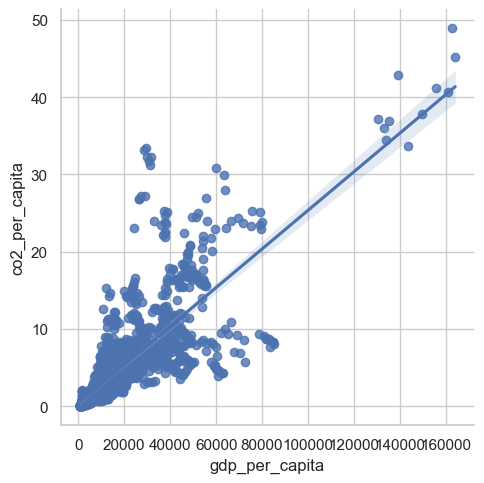

In [74]:
sns.lmplot(x = 'gdp_per_capita', y = 'co2_per_capita', data = df)

#### Discussion
Here is a more interesting situation - since both axes are averaged by the population, China and India do not stand out - but Qatar. Being a  "rich" country on the very hot climate, it uses a lot of fossile based energy for cooling.
Apart from it, we can see two big clusterings down left, one with countries having a high ratio of co2 emission to gdp (obove the line) and a lower also with high gdp per capita but low emissions. 

<Figure size 1000x600 with 0 Axes>

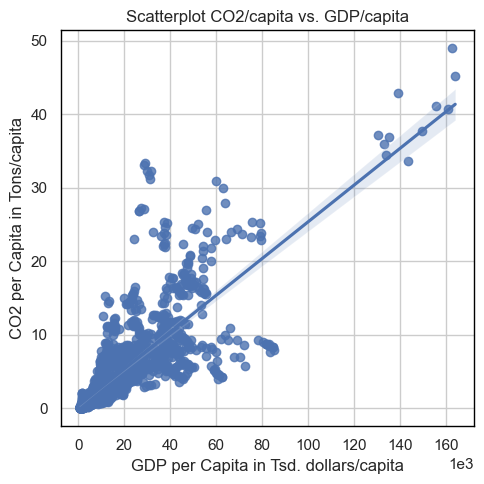

In [75]:
# This plot was generated with help of ChatGTP

# Create a seaborn scatterplot with regression line
sns.set(style="whitegrid")  # Use whitegrid style for background grid
plt.figure(figsize=(10, 6))  # Set the figure size

# Create the scatterplot
g = sns.lmplot(x='gdp_per_capita', y='co2_per_capita', data=df)

# Customize the underlying axes
for ax in g.axes.flat:
    # Enable the grid
    ax.grid(True)
    
    # Customize the ticks
    ax.ticklabel_format(style='sci', axis='x', scilimits=(3, 3))  # Use scientific notation for x-axis
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(3, 3))  # Use scientific notation for y-axis

    # Set labels and title
    ax.set_xlabel('GDP per Capita in Tsd. dollars/capita')
    ax.set_ylabel('CO2 per Capita in Tons/capita')
    ax.set_title('Scatterplot CO2/capita vs. GDP/capita')
    
    # Add a full box around the grid
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<hr style="border: none; height: 1px; background-color: #333;" />

### 3.3. Pair Plots

In [76]:
subset = df[['co2', 'population', 'gdp', 'co2_per_capita', "gdp_per_capita"]]

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

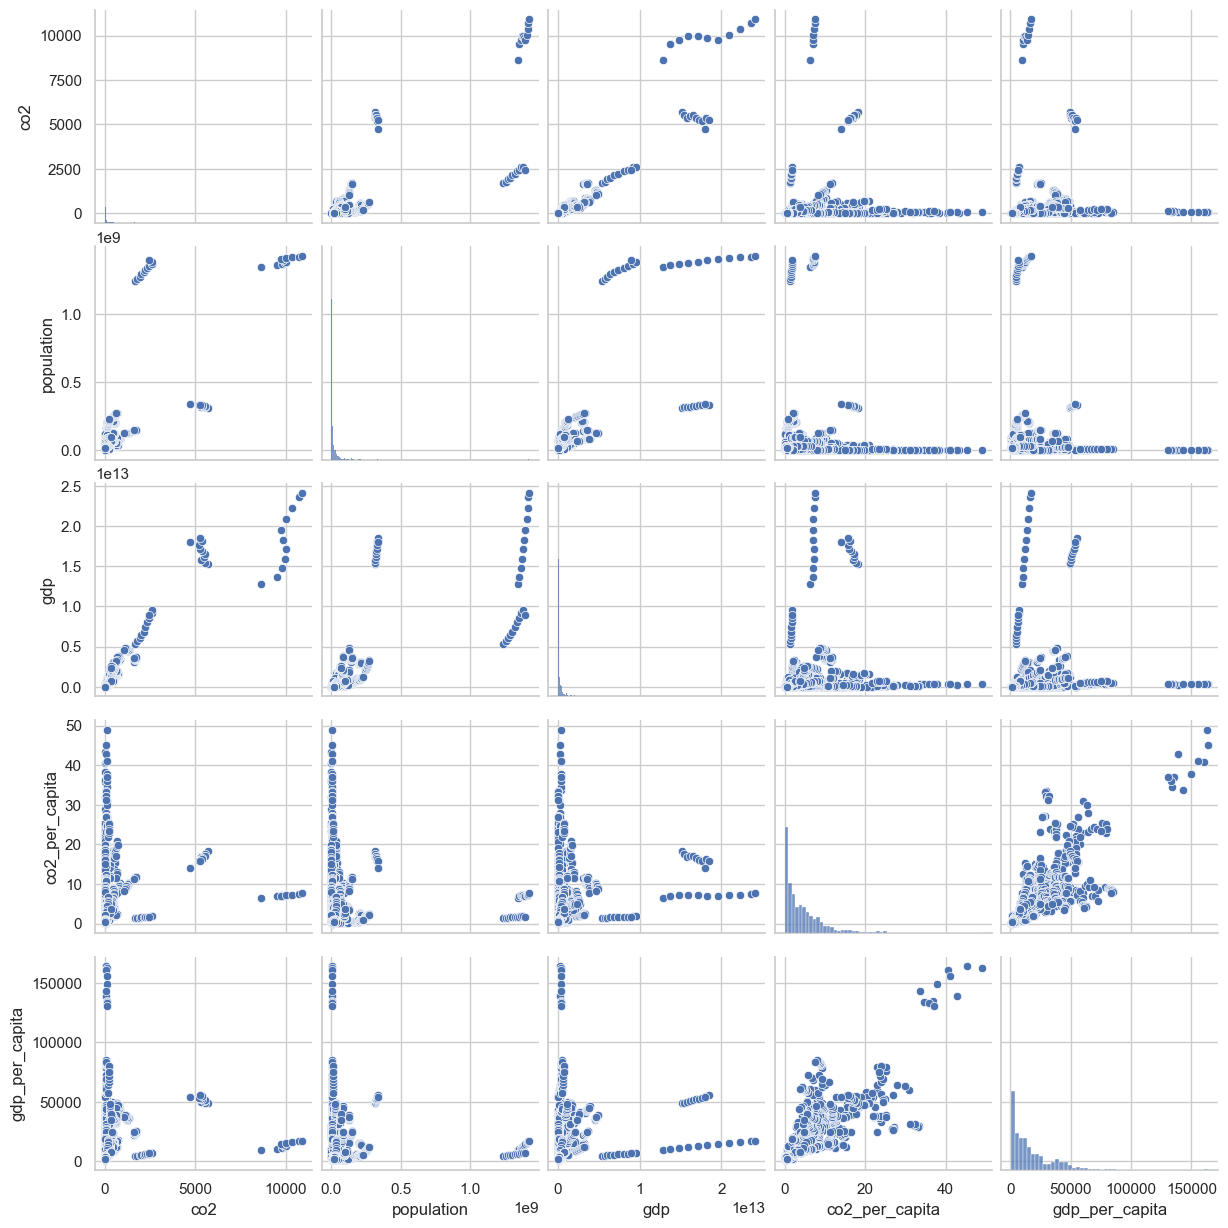

In [77]:
# Create a pair plot 

g = sns.pairplot(subset)

#### Discussion 
All the plots involving "brutto" CO2 emissions, population and GDP have the three outliers China, India and USA at some form (highly visible in the histograms). The numbers per capita are much more easy to compare since it averages out the population effect.

<hr style="border: none; height: 1px; background-color: #333;" />

### 3.4. Categorical Plots

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gdp_per_capita', ylabel='Count'>

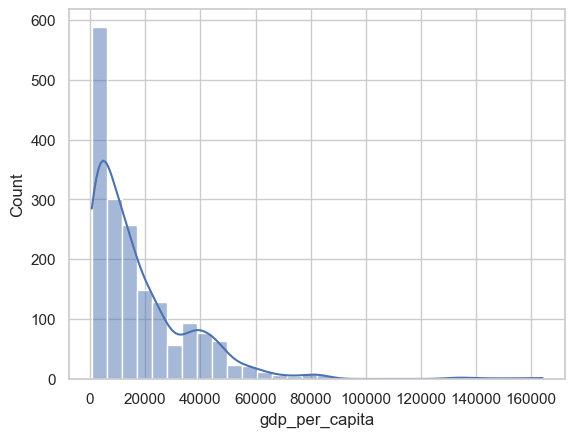

In [78]:
# Creating a histogram of GDP per capita

sns.histplot(df['gdp_per_capita'], bins = 30, kde = True)


#### Discussion
The high majority of the countries have an gdp per capita under 20.000 dollars per capita. there ae some outliers in the higher range .

#### Creating three categories 

In [79]:
df.loc[df['gdp_per_capita'] < 10000, 'Economic_power'] = 'Low income'

In [80]:
df.loc[(df['gdp_per_capita'] >= 10000) & (df['gdp_per_capita'] < 30000), 'Economic_power'] = 'Middle income'

In [81]:
df.loc[df['gdp_per_capita'] >= 30000, 'Economic_power'] = 'High income'

In [82]:
df['Economic_power'].value_counts(dropna = False)

Economic_power
Low income       806
NaN              649
Middle income    637
High income      361
Name: count, dtype: int64

In [83]:
df.columns

Index(['population', 'gdp', 'co2', 'co2_growth_prct', 'co2_per_capita',
       'co2_per_gdp', 'co2_per_unit_energy', 'gdp_per_capita',
       'Economic_power'],
      dtype='object')

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


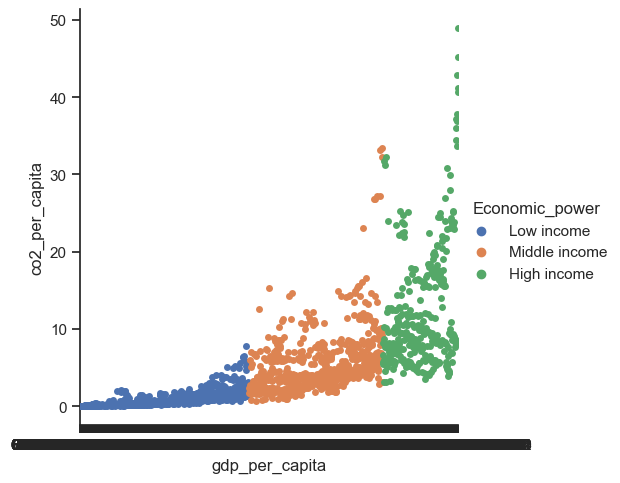

In [84]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")

g = sns.catplot(x="gdp_per_capita",y="co2_per_capita", hue="Economic_power", data=df)

#### Discussion

As expected, countries with lower GDP tend to emit less than high income ones. However, it is clear that it is possible to have high income AND low emission, problably countries with a ore renewable energy matrix.

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


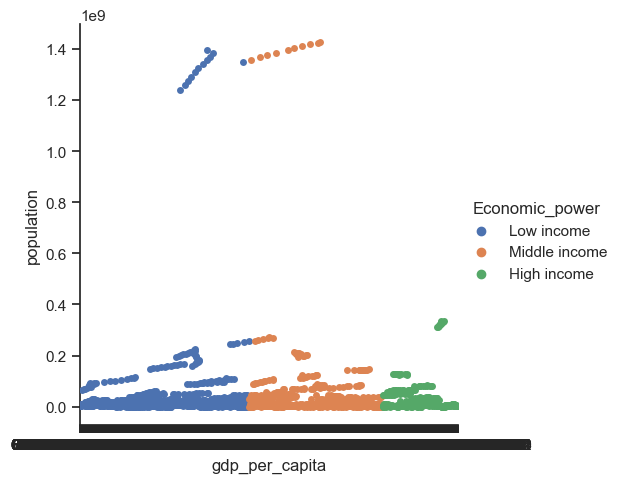

In [85]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")

g = sns.catplot(x="gdp_per_capita",y="population", hue="Economic_power", data=df)

#### Discussion

In this visualization we can see again how the population of China and India stands out from the the rest of the world. One interesting point is the lack of correlation as to the size of a country and its economic power, it it some how evenly distributed.

#### TO DO: I have to find out how to correct the x ticks since it is not possible to read the scale